In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (classification_report, confusion_matrix, f1_score,
                             precision_score, recall_score, roc_auc_score,
                             precision_recall_curve, average_precision_score)

# Modèles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Gestion du déséquilibre
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.combine import SMOTEENN

In [25]:
df=pd.read_table("Data_Projet1.txt",sep=";")
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20,2017-02-01 07:32:14,1,0,0,0,551,...,"37,186667890919111","52,076033757361408",0,1,4,4,4,20,0,27134
1,A013011306908024927155000,78643045,0,20,2017-02-01 07:43:37,1,0,0,0,551,...,"48,844716275908937","52,076033757361408",1,2,"1,7976851851851852",4,4,"28,609999999999999","8,6099999999999994",27817
2,A013010002908283134592527,78643046,0,"57,640000000000001",2017-02-01 07:47:38,1,0,0,0,549,...,"73,118279569892479","52,076033757361408",0,1,4,4,4,"57,640000000000001",0,28058
3,A011010002908105209831316,78643047,0,"54,289999999999999",2017-02-01 07:48:48,0,1,1,1,267,...,"110,05692599620494","53,554233554497365",0,1,4,4,4,"54,289999999999999",0,28128
4,A013010041908000125652029,78643048,0,"26,899999999999999",2017-02-01 08:13:27,1,0,0,0,549,...,"45,36831264567185","52,076033757361408",1,1,"1,9971064814814814",4,4,"59,149999999999999","32,25",29607


In [26]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646774 entries, 0 to 4646773
Data columns (total 23 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   ZIBZIN                    object
 1   IDAvisAutorisationCheque  object
 2   FlagImpaye                object
 3   Montant                   object
 4   DateTransaction           object
 5   CodeDecision              object
 6   VerifianceCPT1            object
 7   VerifianceCPT2            object
 8   VerifianceCPT3            object
 9   D2CB                      object
 10  ScoringFP1                object
 11  ScoringFP2                object
 12  ScoringFP3                object
 13  TauxImpNb_RB              object
 14  TauxImpNB_CPM             object
 15  EcartNumCheq              object
 16  NbrMagasin3J              object
 17  DiffDateTr1               object
 18  DiffDateTr2               object
 19  DiffDateTr3               object
 20  CA3TRetMtt                object
 21  CA3TR   

In [27]:
df.describe()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
count,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,...,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774,4646774
unique,1280127,3831106,5,42864,3097882,10,22,34,43,1103,...,663,82,15585,10,154511,51510,12665,67973,35316,71497
top,A075000041908023367242120,80598968,0,30,2017-03-04 17:18:31,0,0,0,0,1,...,"45,36831264567185","52,076033757361408",0,1,4,4,4,30,0,40646
freq,217,2,4584151,37028,14,3483828,3593113,3593113,3593113,936673,...,202994,445066,4040408,4446255,3162537,3605264,3672048,32497,4068163,207


In [28]:
df["FlagImpaye"].value_counts()

FlagImpaye
0             4584151
0               32627
1               29855
1                 140
FlagImpaye          1
Name: count, dtype: int64

In [29]:
print(df.isna().sum())

ZIBZIN                      0
IDAvisAutorisationCheque    0
FlagImpaye                  0
Montant                     0
DateTransaction             0
CodeDecision                0
VerifianceCPT1              0
VerifianceCPT2              0
VerifianceCPT3              0
D2CB                        0
ScoringFP1                  0
ScoringFP2                  0
ScoringFP3                  0
TauxImpNb_RB                0
TauxImpNB_CPM               0
EcartNumCheq                0
NbrMagasin3J                0
DiffDateTr1                 0
DiffDateTr2                 0
DiffDateTr3                 0
CA3TRetMtt                  0
CA3TR                       0
Heure                       0
dtype: int64


In [30]:
df.dtypes

ZIBZIN                      object
IDAvisAutorisationCheque    object
FlagImpaye                  object
Montant                     object
DateTransaction             object
CodeDecision                object
VerifianceCPT1              object
VerifianceCPT2              object
VerifianceCPT3              object
D2CB                        object
ScoringFP1                  object
ScoringFP2                  object
ScoringFP3                  object
TauxImpNb_RB                object
TauxImpNB_CPM               object
EcartNumCheq                object
NbrMagasin3J                object
DiffDateTr1                 object
DiffDateTr2                 object
DiffDateTr3                 object
CA3TRetMtt                  object
CA3TR                       object
Heure                       object
dtype: object

In [31]:
doublons = df.duplicated()

if doublons.any():
    print(f"Nombre de doublons : {doublons.sum():,}")
else:
    print("Aucun doublon détecté")


Nombre de doublons : 815,668


In [32]:
#Nettoyer les données avec headers répétés et espaces


print(" NETTOYAGE DES DONNÉES")

# SUPPRIMER LES LIGNES D'EN-TÊTE RÉPÉTÉES

print("\n Suppression des lignes d'en-tête répétées...")

# Ces lignes contiennent le nom de la colonne au lieu d'une valeur
# Exemple: ligne où VerifianceCPT1 = "VerifianceCPT1"
mask_header = (
    (df['VerifianceCPT1'] == 'VerifianceCPT1') |
    (df['D2CB'] == 'D2CB') |
    (df['Heure'] == 'Heure') |
    (df['FlagImpaye'] == 'FlagImpaye')
)

nb_headers = mask_header.sum()
print(f" Lignes d'en-tête trouvées: {nb_headers:,}")

if nb_headers > 0:
    df = df[~mask_header].copy()
    print(f" {nb_headers:,} lignes supprimées")
    print(f" Dataset: {len(df):,} lignes restantes")

# 2. NETTOYER ET CONVERTIR LES COLONNES

print("\n Conversion des colonnes numériques...")

def clean_and_convert(series):
    """
    Nettoie et convertit une série en numérique
    - Enlève les espaces
    - Remplace virgules par points
    - Convertit en numérique
    """
    if series.dtype == 'object':
        # Enlever espaces et remplacer virgules
        cleaned = series.astype(str).str.strip().str.replace(',', '.')
        # Convertir en numérique
        numeric = pd.to_numeric(cleaned, errors='coerce')
        return numeric
    return series

# Liste des colonnes à convertir
numeric_cols = ['Montant', 'VerifianceCPT1', 'VerifianceCPT2', 'VerifianceCPT3',
                'D2CB', 'ScoringFP1', 'ScoringFP2', 'ScoringFP3',
                'TauxImpNb_RB', 'TauxImpNB_CPM', 'EcartNumCheq', 'NbrMagasin3J',
                'DiffDateTr1', 'DiffDateTr2', 'DiffDateTr3',
                'CA3TRetMtt', 'CA3TR', 'Heure']

for col in numeric_cols:
    if col in df.columns:
        avant_nan = df[col].isna().sum()
        df[col] = clean_and_convert(df[col])
        apres_nan = df[col].isna().sum()

        if apres_nan > avant_nan:
            print(f"{col}: {apres_nan - avant_nan:,} nouvelles valeurs NaN")
        else:
            print(f"{col}")

# 3. NETTOYER FlagImpaye

print("\n FlagImpaye (variable cible)...")
df['FlagImpaye'] = df['FlagImpaye'].astype(str).str.strip()
df['FlagImpaye'] = pd.to_numeric(df['FlagImpaye'], errors='coerce').fillna(0).astype(int)
print(f" Distribution: {df['FlagImpaye'].value_counts().to_dict()}")

# 4. NETTOYER DateTransaction

print("\nDateTransaction...")
df['DateTransaction'] = pd.to_datetime(df['DateTransaction'], errors='coerce')
print(f"Converti")

# 5. NETTOYER CodeDecision
print("\n CodeDecision...")
df['CodeDecision'] = pd.to_numeric(df['CodeDecision'], errors='coerce')
print(f"Converti")

# 6. VÉRIFICATION FINALE

print(" VÉRIFICATION FINALE DES VALEURS MANQUANTES")

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Nb_Manquantes': missing,
    'Pourcentage': missing_pct
})
missing_df = missing_df[missing_df['Nb_Manquantes'] > 0].sort_values('Nb_Manquantes', ascending=False)

if len(missing_df) > 0:
    print("\nValeurs manquantes restantes:")
    print(missing_df)

    # Si peu de NaN, on peut les imputer
    if missing_df['Nb_Manquantes'].max() < len(df) * 0.01:  # < 1%
        print("\nPeu de valeurs manquantes (<1%) → on peut les imputer")
else:
    print("\nAUCUNE valeur manquante!")

print("\nNETTOYAGE TERMINÉ AVEC SUCCÈS!")
print(f"Dataset final: {len(df):,} lignes × {df.shape[1]} colonnes")


 NETTOYAGE DES DONNÉES

 Suppression des lignes d'en-tête répétées...
 Lignes d'en-tête trouvées: 1
 1 lignes supprimées
 Dataset: 4,646,773 lignes restantes

 Conversion des colonnes numériques...
Montant
VerifianceCPT1
VerifianceCPT2
VerifianceCPT3
D2CB
ScoringFP1
ScoringFP2
ScoringFP3
TauxImpNb_RB
TauxImpNB_CPM
EcartNumCheq
NbrMagasin3J
DiffDateTr1
DiffDateTr2
DiffDateTr3
CA3TRetMtt
CA3TR
Heure

 FlagImpaye (variable cible)...
 Distribution: {0: 4616778, 1: 29995}

DateTransaction...
Converti

 CodeDecision...
Converti
 VÉRIFICATION FINALE DES VALEURS MANQUANTES

AUCUNE valeur manquante!

NETTOYAGE TERMINÉ AVEC SUCCÈS!
Dataset final: 4,646,773 lignes × 23 colonnes


In [33]:
# Vérifier les nouveaux types
print("Types de données après nettoyage:\n")
df.dtypes

Types de données après nettoyage:



ZIBZIN                              object
IDAvisAutorisationCheque            object
FlagImpaye                           int64
Montant                            float64
DateTransaction             datetime64[ns]
CodeDecision                         int64
VerifianceCPT1                       int64
VerifianceCPT2                       int64
VerifianceCPT3                       int64
D2CB                                 int64
ScoringFP1                         float64
ScoringFP2                         float64
ScoringFP3                         float64
TauxImpNb_RB                       float64
TauxImpNB_CPM                      float64
EcartNumCheq                         int64
NbrMagasin3J                         int64
DiffDateTr1                        float64
DiffDateTr2                        float64
DiffDateTr3                        float64
CA3TRetMtt                         float64
CA3TR                              float64
Heure                                int64
dtype: obje

In [34]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne:\n")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Nb_Manquantes': missing,
    'Pourcentage': missing_pct
})
missing_df = missing_df[missing_df['Nb_Manquantes'] > 0].sort_values('Nb_Manquantes', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✓ Aucune valeur manquante!")

Valeurs manquantes par colonne:

✓ Aucune valeur manquante!



## Analyse Exploratoire

In [35]:
print("ANALYSE DE LA VARIABLE CIBLE: FlagImpaye")

# Distribution
print("\nDistribution des valeurs:")
print(df['FlagImpaye'].value_counts())

print("\nPourcentages:")
print(df['FlagImpaye'].value_counts(normalize=True) * 100)

ANALYSE DE LA VARIABLE CIBLE: FlagImpaye

Distribution des valeurs:
FlagImpaye
0    4616778
1      29995
Name: count, dtype: int64

Pourcentages:
FlagImpaye
0    99.354498
1     0.645502
Name: proportion, dtype: float64


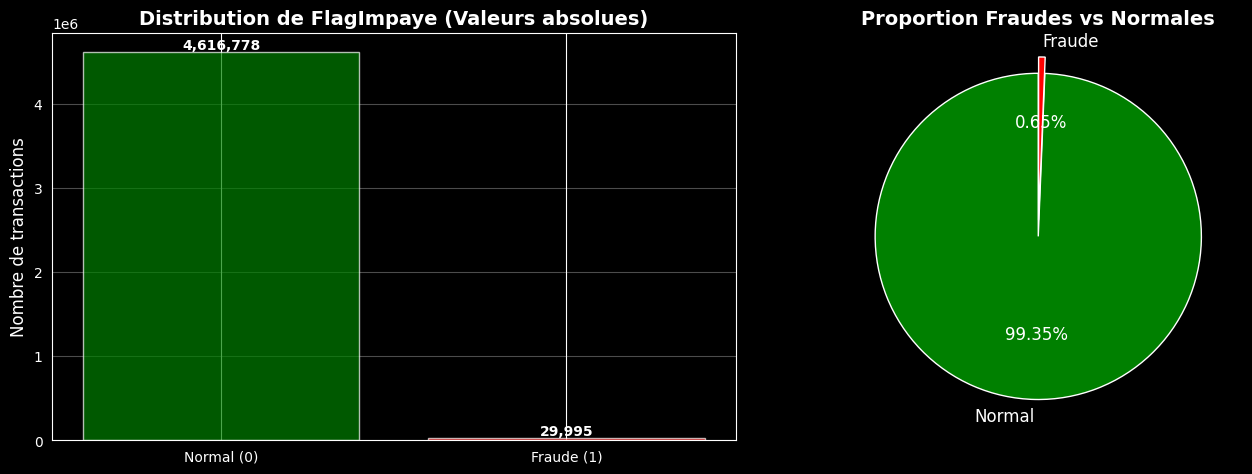

In [36]:
# Visualisation de la distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot
counts = df['FlagImpaye'].value_counts()
axes[0].bar(['Normal (0)', 'Fraude (1)'], counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_ylabel('Nombre de transactions', fontsize=12)
axes[0].set_title('Distribution de FlagImpaye (Valeurs absolues)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart avec pourcentages
colors = ['green', 'red']
explode = (0, 0.1)  # Séparer la partie fraude
axes[1].pie(counts.values, labels=['Normal', 'Fraude'], autopct='%1.2f%%',
            colors=colors, explode=explode, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Proportion Fraudes vs Normales', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [37]:
print("ANALYSE DES MONTANTS")

print("\nStatistiques globales:")
print(df['Montant'].describe())

print("\nStatistiques par type de transaction:")
print(df.groupby('FlagImpaye')['Montant'].describe())

ANALYSE DES MONTANTS

Statistiques globales:
count    4.646773e+06
mean     6.014214e+01
std      1.019927e+02
min      1.000000e-02
25%      2.598000e+01
50%      4.412000e+01
75%      7.304000e+01
max      1.212600e+05
Name: Montant, dtype: float64

Statistiques par type de transaction:
                count       mean         std   min    25%     50%     75%  \
FlagImpaye                                                                  
0           4616778.0  59.917604  101.784599  0.01  25.93  44.015   72.87   
1             29995.0  94.702402  125.415599  1.43  36.80  60.010  105.41   

                  max  
FlagImpaye             
0           121260.00  
1             3775.27  


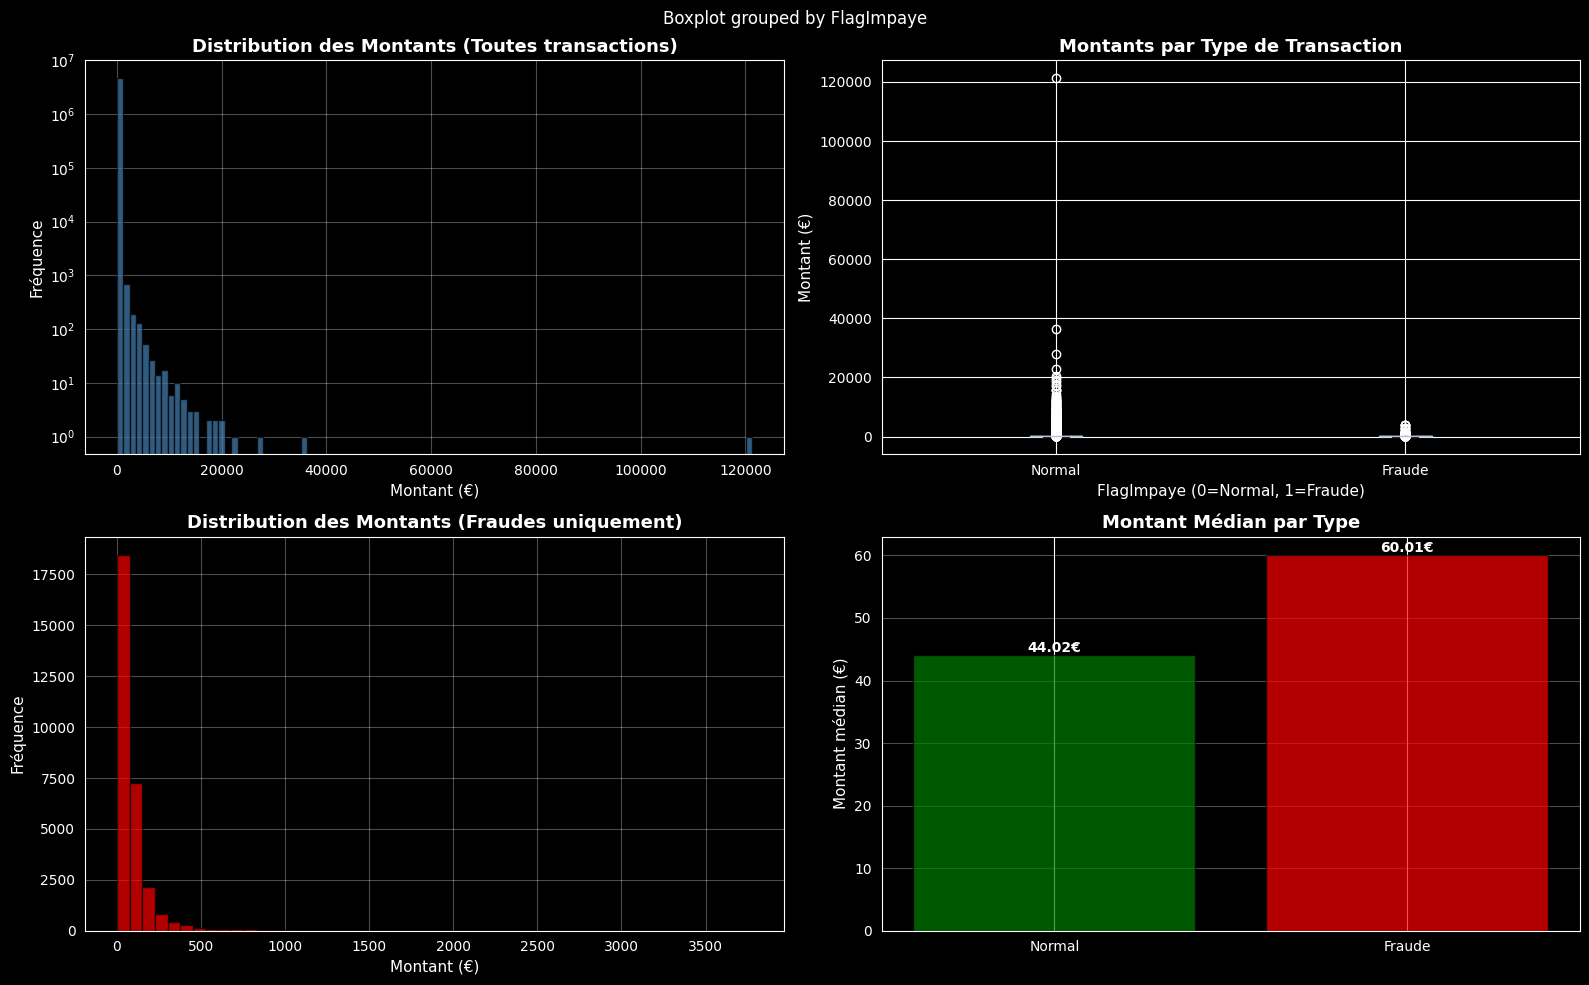


 Insight:
   Montant médian Normal: 44.02€
   Montant médian Fraude: 60.01€


In [38]:
# Visualisation des montants
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Distribution globale (échelle log car très étendue)
axes[0, 0].hist(df['Montant'].dropna(), bins=100, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Montant (€)', fontsize=11)
axes[0, 0].set_ylabel('Fréquence', fontsize=11)
axes[0, 0].set_title('Distribution des Montants (Toutes transactions)', fontsize=13, fontweight='bold')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(alpha=0.3)

# 2. Boxplot par type
df.boxplot(column='Montant', by='FlagImpaye', ax=axes[0, 1])
axes[0, 1].set_xlabel('FlagImpaye (0=Normal, 1=Fraude)', fontsize=11)
axes[0, 1].set_ylabel('Montant (€)', fontsize=11)
axes[0, 1].set_title('Montants par Type de Transaction', fontsize=13, fontweight='bold')
plt.sca(axes[0, 1])
plt.xticks([1, 2], ['Normal', 'Fraude'])

# 3. Distribution des fraudes uniquement
fraudes = df[df['FlagImpaye'] == 1]
axes[1, 0].hist(fraudes['Montant'].dropna(), bins=50, color='red', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Montant (€)', fontsize=11)
axes[1, 0].set_ylabel('Fréquence', fontsize=11)
axes[1, 0].set_title('Distribution des Montants (Fraudes uniquement)', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Comparaison des médianes
medians = df.groupby('FlagImpaye')['Montant'].median()
axes[1, 1].bar(['Normal', 'Fraude'], medians.values, color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Montant médian (€)', fontsize=11)
axes[1, 1].set_title('Montant Médian par Type', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(medians.values):
    axes[1, 1].text(i, v, f'{v:.2f}€', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Insights
median_normal = df[df['FlagImpaye']==0]['Montant'].median()
median_fraude = df[df['FlagImpaye']==1]['Montant'].median()
print(f"\n Insight:")
print(f"   Montant médian Normal: {median_normal:.2f}€")
print(f"   Montant médian Fraude: {median_fraude:.2f}€")


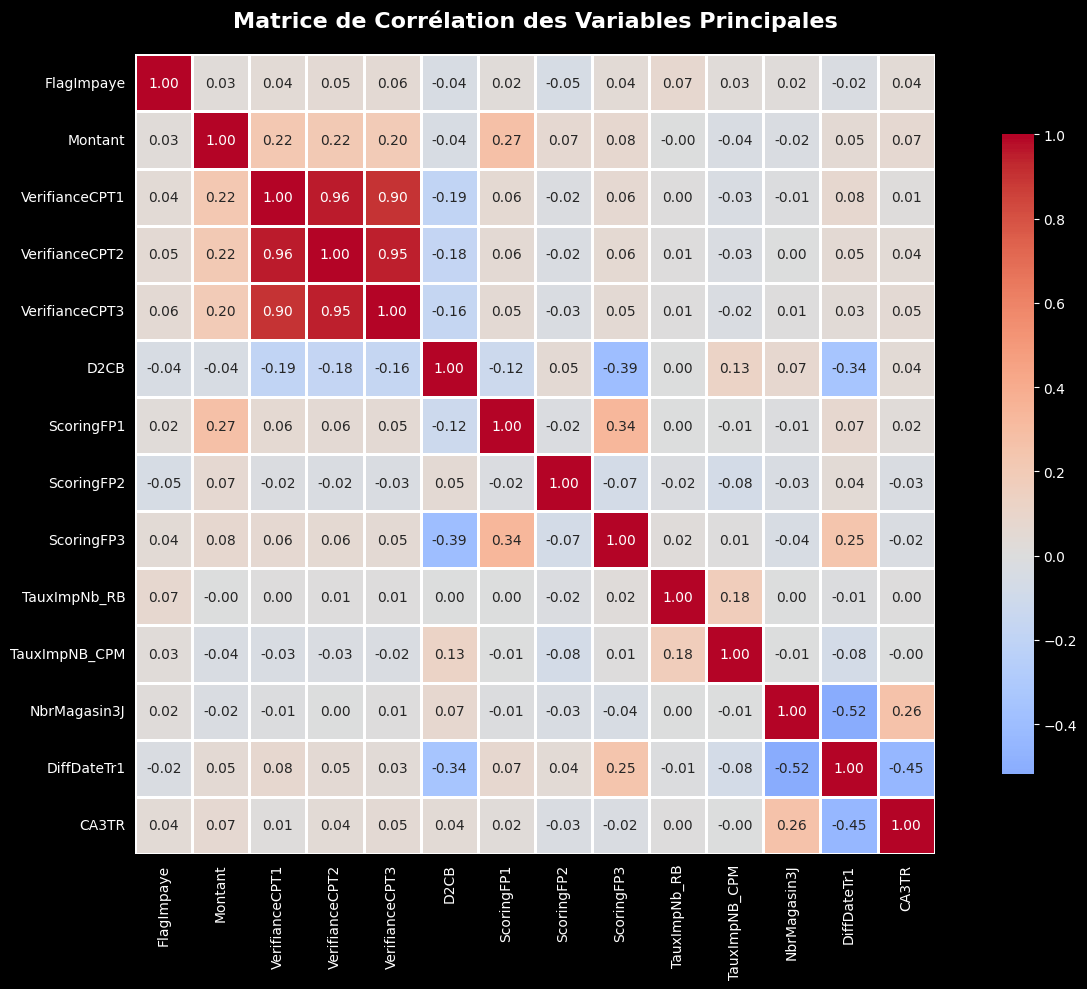


Corrélations avec la variable cible (FlagImpaye):

FlagImpaye        1.000000
TauxImpNb_RB      0.072770
VerifianceCPT3    0.055624
VerifianceCPT2    0.050874
CA3TR             0.044904
ScoringFP3        0.041051
VerifianceCPT1    0.039841
TauxImpNB_CPM     0.030408
Montant           0.027313
ScoringFP1        0.024378
NbrMagasin3J      0.015638
DiffDateTr1      -0.021737
D2CB             -0.041089
ScoringFP2       -0.052845
Name: FlagImpaye, dtype: float64


In [40]:
# Sélectionner les variables numériques importantes
vars_importantes = ['FlagImpaye', 'Montant', 'VerifianceCPT1', 'VerifianceCPT2', 'VerifianceCPT3',
                   'D2CB', 'ScoringFP1', 'ScoringFP2', 'ScoringFP3',
                   'TauxImpNb_RB', 'TauxImpNB_CPM', 'NbrMagasin3J',
                   'DiffDateTr1', 'CA3TR']

# Calculer la matrice de corrélation
corr_matrix = df[vars_importantes].corr()

# Visualisation
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables Principales', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Corrélations avec FlagImpaye
print("\nCorrélations avec la variable cible (FlagImpaye):\n")
corr_cible = corr_matrix['FlagImpaye'].sort_values(ascending=False)
print(corr_cible)

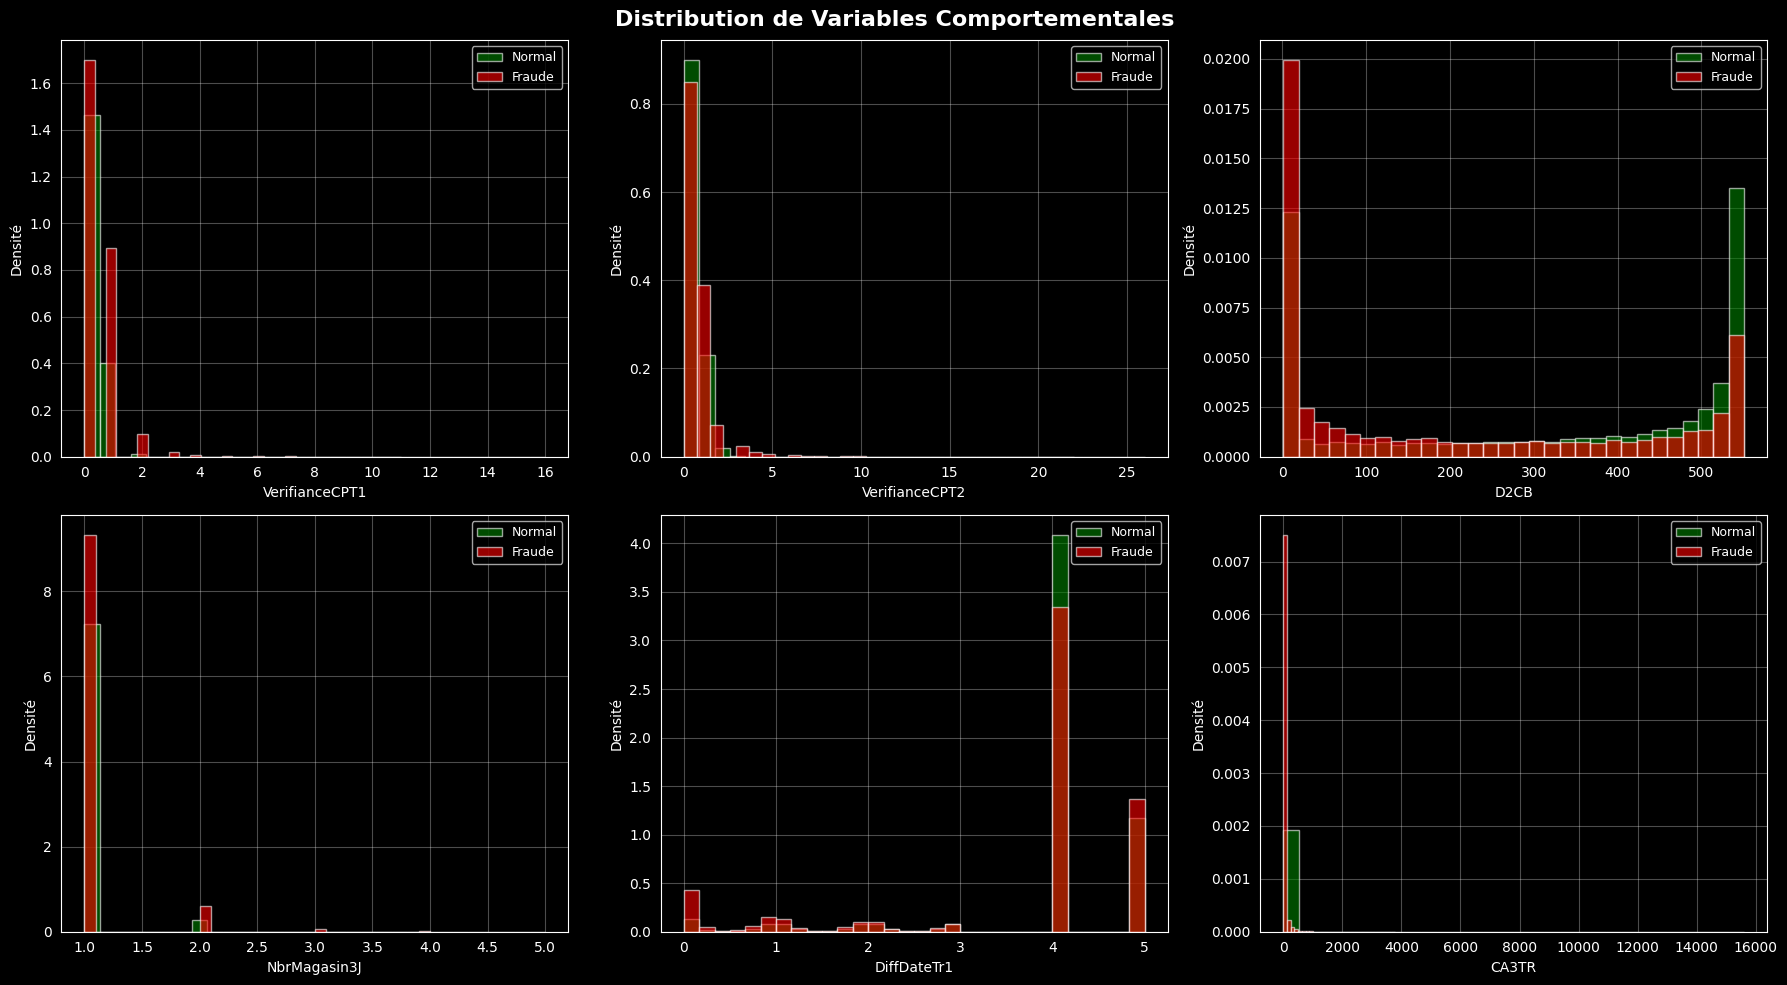

In [41]:
# Analyser quelques variables comportementales importantes
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution de Variables Comportementales', fontsize=16, fontweight='bold')

vars_to_plot = ['VerifianceCPT1', 'VerifianceCPT2', 'D2CB',
                'NbrMagasin3J', 'DiffDateTr1', 'CA3TR']

for idx, var in enumerate(vars_to_plot):
    row = idx // 3
    col = idx % 3

    # Séparer normales et fraudes
    normal_data = df[df['FlagImpaye']==0][var].dropna()
    fraude_data = df[df['FlagImpaye']==1][var].dropna()

    axes[row, col].hist(normal_data, bins=30, alpha=0.6, label='Normal', color='green', density=True)
    axes[row, col].hist(fraude_data, bins=30, alpha=0.6, label='Fraude', color='red', density=True)
    axes[row, col].set_xlabel(var, fontsize=10)
    axes[row, col].set_ylabel('Densité', fontsize=10)
    axes[row, col].legend(fontsize=9)
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [42]:
print("ANALYSE TEMPORELLE")


print(f"\nPremière transaction: {df['DateTransaction'].min()}")
print(f"Dernière transaction: {df['DateTransaction'].max()}")
print(f"Période couverte: {(df['DateTransaction'].max() - df['DateTransaction'].min()).days} jours")

# Créer colonne mois
df['Mois'] = df['DateTransaction'].dt.to_period('M')

print("\nNombre de transactions par mois:")
print(df['Mois'].value_counts().sort_index())

ANALYSE TEMPORELLE

Première transaction: 2017-02-01 07:32:14
Dernière transaction: 2017-11-30 22:07:13
Période couverte: 302 jours

Nombre de transactions par mois:
Mois
2017-02    839001
2017-03    911489
2017-04    926091
2017-05    362375
2017-06    301179
2017-07    288323
2017-08    270904
2017-09    252290
2017-10    242085
2017-11    253036
Freq: M, Name: count, dtype: int64


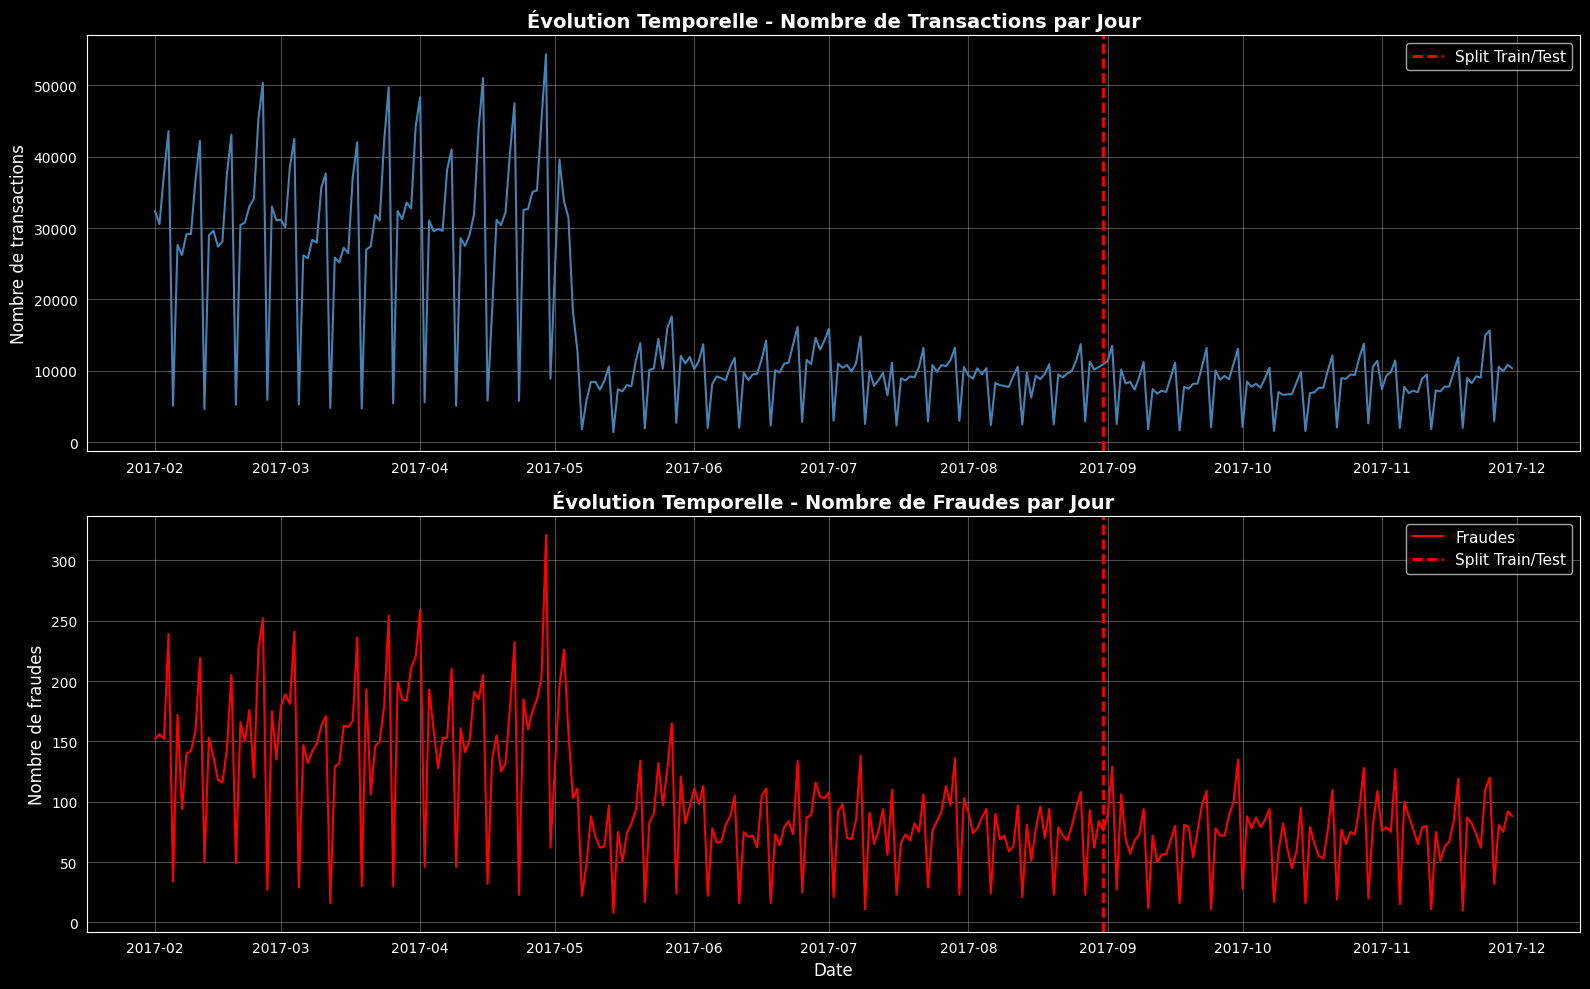

In [43]:
# Évolution temporelle des fraudes
df['Date'] = df['DateTransaction'].dt.date
fraudes_par_jour = df.groupby(['Date', 'FlagImpaye']).size().unstack(fill_value=0)

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# 1. Évolution du nombre total de transactions
total_par_jour = df.groupby('Date').size()
axes[0].plot(total_par_jour.index, total_par_jour.values, color='steelblue', linewidth=1.5)
axes[0].set_ylabel('Nombre de transactions', fontsize=12)
axes[0].set_title('Évolution Temporelle - Nombre de Transactions par Jour', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].axvline(pd.Timestamp('2017-08-31').date(), color='red', linestyle='--', linewidth=2, label='Split Train/Test')
axes[0].legend(fontsize=11)

# 2. Évolution des fraudes
if 1 in fraudes_par_jour.columns:
    axes[1].plot(fraudes_par_jour.index, fraudes_par_jour[1], color='red', linewidth=1.5, label='Fraudes')
    axes[1].set_xlabel('Date', fontsize=12)
    axes[1].set_ylabel('Nombre de fraudes', fontsize=12)
    axes[1].set_title('Évolution Temporelle - Nombre de Fraudes par Jour', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    axes[1].axvline(pd.Timestamp('2017-08-31').date(), color='red', linestyle='--', linewidth=2, label='Split Train/Test')
    axes[1].legend(fontsize=11)

plt.tight_layout()
plt.show()

In [44]:
print("SPLIT TEMPOREL DES DONNÉES")
# Dates de split
train_start = '2017-02-01'
train_end = '2017-08-31'
test_start = '2017-09-01'
test_end = '2017-11-30'

print(f"\nTrain: {train_start} à {train_end}")
print(f"Test:  {test_start} à {test_end}")

# Créer les masques
train_mask = (df['DateTransaction'] >= train_start) & (df['DateTransaction'] <= train_end)
test_mask = (df['DateTransaction'] >= test_start) & (df['DateTransaction'] <= test_end)

# Créer les ensembles
df_train = df[train_mask].copy()
df_test = df[test_mask].copy()

print(f"\nTaille des ensembles:")
print(f"  Train: {len(df_train):,} transactions ({len(df_train)/len(df)*100:.1f}%)")
print(f"  Test:  {len(df_test):,} transactions ({len(df_test)/len(df)*100:.1f}%)")

# Vérifier la distribution des fraudes
train_fraudes = (df_train['FlagImpaye']==1).sum()
test_fraudes = (df_test['FlagImpaye']==1).sum()

print(f"\nDistribution des fraudes:")
print(f"  Train: {train_fraudes:,} fraudes ({train_fraudes/len(df_train)*100:.2f}%)")
print(f"  Test:  {test_fraudes:,} fraudes ({test_fraudes/len(df_test)*100:.2f}%)")


SPLIT TEMPOREL DES DONNÉES

Train: 2017-02-01 à 2017-08-31
Test:  2017-09-01 à 2017-11-30

Taille des ensembles:
  Train: 3,888,468 transactions (83.7%)
  Test:  737,068 transactions (15.9%)

Distribution des fraudes:
  Train: 23,346 fraudes (0.60%)
  Test:  6,485 fraudes (0.88%)


In [47]:
print("SAUVEGARDE DES DONNÉES NETTOYÉES")

# Sauvegarder les ensembles train et test
df_train.to_csv('data_train_cleaned.csv', index=False)
print("Train sauvegardé: data_train_cleaned.csv")

df_test.to_csv('data_test_cleaned.csv', index=False)
print("Test sauvegardé: data_test_cleaned.csv")

# Sauvegarder aussi le dataset complet nettoyé
df.to_csv('data_complete_cleaned.csv', index=False)
print("Dataset complet sauvegardé: data_complete_cleaned.csv")

print("\nToutes les données sont prêtes pour la modélisation!")

SAUVEGARDE DES DONNÉES NETTOYÉES
Train sauvegardé: data_train_cleaned.csv
Test sauvegardé: data_test_cleaned.csv
Dataset complet sauvegardé: data_complete_cleaned.csv

Toutes les données sont prêtes pour la modélisation!
